In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib
from nilearn.plotting import plot_design_matrix, plot_stat_map
from nilearn.reporting import get_clusters_table
from nilearn import datasets
import glob
import os
import numpy as np

In [5]:
def filter_corrp_ts(tval_img, pval_img, threshold=0.95):
    if isinstance(tval_img, str):
        tval_img = nib.load(tval_img)
    if isinstance(pval_img, str):
        pval_img = nib.load(pval_img)
        
    tval_data = tval_img.get_fdata()
    pval_data = pval_img.get_fdata()
    filt_tval_data = np.where(pval_data > threshold, tval_data, 0)
    filt_tval_img = nib.Nifti1Image(filt_tval_data.astype(np.float64), tval_img.affine)
    
    return filt_tval_img

def plot_filt_tval_img(reg):
    pval_pattern = '%s/rand_model1_%s_tfce_corrp_tstat1.nii.gz'%(reg, reg)
    tval_pattern = '%s/rand_model1_%s_tstat1_tfce.nii.gz'%(reg, reg)
    pval_img = os.path.join(level3_path, pval_pattern)
    tval_img = os.path.join(level3_path, tval_pattern)
    filt_tval_img = filter_corrp_ts(tval_img, pval_img)
    if(len(np.unique(filt_tval_img.get_fdata())) == 1):
        print('Nothing survives correction for %s'%(reg))
    else:
        plot_stat_map(filt_tval_img, 
             draw_cross=False,
             title=os.path.basename(tval_img))

In [3]:
level3_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/bids_nifti_wface/derivatives/nilearn/glm/level3/model1'

# Event regressors

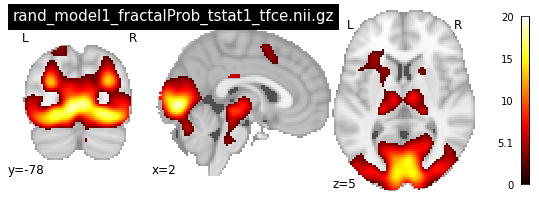

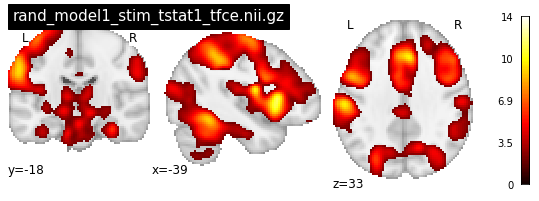

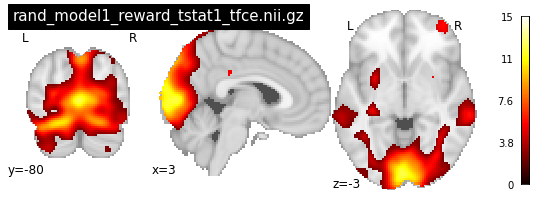

In [6]:
regs = ['fractalProb', 'stim', 'reward']
for reg in regs:
    plot_filt_tval_img(reg)

# Parametric regressors

Nothing survives correction for fractalProbParam
Nothing survives correction for valDiff
Nothing survives correction for rewardParam


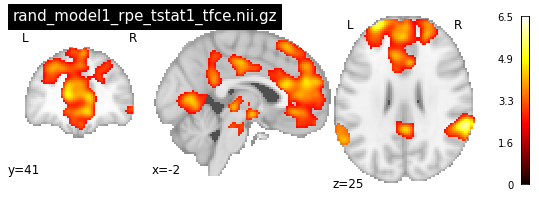

In [7]:
regs = ['fractalProbParam', 'valDiff', 'rewardParam', 'rpe']
for reg in regs:
    plot_filt_tval_img(reg)

In [12]:
reg = 'rpe'
pval_pattern = '%s/rand_model1_%s_tfce_corrp_tstat1.nii.gz'%(reg, reg)
pval_img = os.path.join(level3_path, pval_pattern)
get_clusters_table(pval_img, stat_threshold=.95, cluster_threshold=20)

/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/reporting/_get_clusters_table.py:97: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(


,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-24.5,57.5,29.5,0.993,146384
1,1a,-8.5,45.5,15.5,0.993,
2,1b,-8.5,41.5,3.5,0.992,
3,1c,-24.5,51.5,29.5,0.992,
4,2,63.5,-40.5,29.5,0.993,55472
5,2a,55.5,-42.5,27.5,0.992,
6,2b,51.5,27.5,-0.5,0.992,
7,2c,61.5,-46.5,21.5,0.992,
8,3,9.5,-10.5,-8.5,0.984,11032
9,3a,-8.5,-6.5,-8.5,0.980,


In [14]:
harvard_oxford = datasets.fetch_atlas_harvard_oxford('cort-prob-2mm')


Dataset created in /Users/zeynepenkavi/nilearn_data/fsl



Downloaded 24895488 of 25716861 bytes (96.8%,    0.1s remaining) ...done. (5 seconds, 0 min)
Extracting data from /Users/zeynepenkavi/nilearn_data/fsl/f627ac501ac9e24b781981dbe4f4f56f/HarvardOxford.tgz..... done.


In [16]:
harvard_oxford_sub = datasets.fetch_atlas_harvard_oxford('sub-prob-2mm')

In [17]:
harvard_oxford_sub

{'maps': '/Users/zeynepenkavi/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-sub-prob-2mm.nii.gz',
 'labels': ['Background',
  'Left Cerebral White Matter',
  'Left Cerebral Cortex ',
  'Left Lateral Ventrical',
  'Left Thalamus',
  'Left Caudate',
  'Left Putamen',
  'Left Pallidum',
  'Brain-Stem',
  'Left Hippocampus',
  'Left Amygdala',
  'Left Accumbens',
  'Right Cerebral White Matter',
  'Right Cerebral Cortex ',
  'Right Lateral Ventricle',
  'Right Thalamus',
  'Right Caudate',
  'Right Putamen',
  'Right Pallidum',
  'Right Hippocampus',
  'Right Amygdala',
  'Right Accumbens']}

# Contrasts

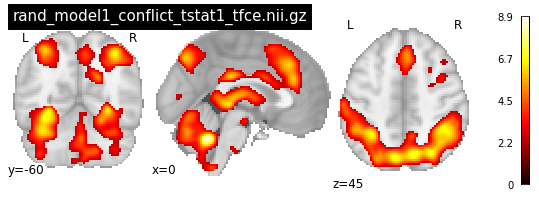

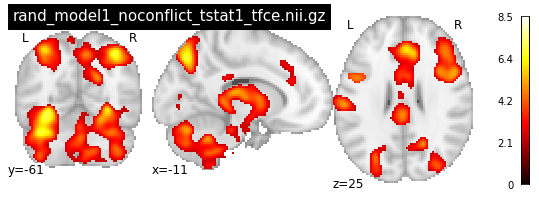

In [8]:
regs = ['conflict', 'noconflict']
for reg in regs:
    plot_filt_tval_img(reg)

# Interactions with p(Fractal)

# Slow vs fast learner differences